<a href="https://colab.research.google.com/github/iaagulo/Machine-Learning-with-the-MNIST-Digits-Python/blob/main/Example_MNIST_Digits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Written Digits**

####**Importing the Necessary Libraries**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Loading the MNIST Digits Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


There are 60,000 sample training images of the digits between 0 and 9. Each digit has 28 x 28 pixels.

In [3]:
X_train.shape

(60000, 28, 28)

Consider the 201st digit in the data set. Here are the pixel values. Zero corresponds to black and 255 corresponds to white.

In [ ]:
X_train[200]

Here is the 201st label. 

In [ ]:
y_train[200]

We now show the image corresponding to the 201st digit. It should show the same digit as the 201st label.

In [ ]:
plt.matshow(X_train[200])

There are 10,000 sample test images of the digits between 0 and 9. Each digit has 28 x 28 pixels.

In [ ]:
X_test.shape

Again, here is the 201st test digit.

In [ ]:
X_test[200]

Here is the corresponding 201st label of the test digit.

In [ ]:
y_test[200]

We can see that the image shown is the same as the 201st label. 

In [ ]:
plt.matshow(X_test[200])

#####**Preparing the Data**

Let's scale the data to improve the accuracy.

In [11]:
X_train = X_train/255
X_test = X_test/255

Then, let's take a look at the dimensions of $X\_train$ and $X\_test$.

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We want to convert the each of the 28 x 28 image array to a 1 x 784 array. Each of these flattened images will serve as the input layer to the neural network. We do this by using the $reshape$ command.

In [32]:
X_train_flat = X_train.reshape(len(X_train),28,28,1)
X_test_flat = X_test.reshape(len(X_test),28,28,1)

Now, let's take a look at the dimensions of $X\_train$ and $X\_test$.

In [33]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


####**Defining the model**

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 10816)             0         
                                                                 
 dropout_12 (Dropout)        (None, 10816)             0         
                                                                 
 dense_24 (Dense)            (None, 512)               5538304   
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                     

####**Compiling the model**

In [39]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              # loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

####**Training the model**

In [40]:
history = model.fit(X_train_flat, y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1373 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0376 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0270 - accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0203 - accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0110 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 10/10
1875/1875 [==============================] 

####**Evaluating the performance**

In [41]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0479 - accuracy: 0.9879


[0.04785918444395065, 0.9879000186920166]

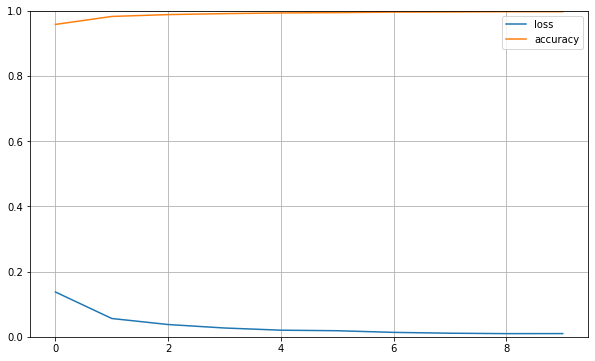

In [42]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
prediction = model.predict(X_test_flat)
print(prediction)

313/313 [==============================] - 4s 12ms/step
[[9.3608660e-15 1.5140687e-11 3.4830080e-11 ... 9.9999994e-01
  7.3931895e-14 9.3010807e-12]
 [5.3175881e-16 6.5469960e-13 9.9999994e-01 ... 2.4064268e-23
  4.6772994e-22 5.8024342e-23]
 [1.0900366e-12 9.9999946e-01 1.7813231e-10 ... 1.9923124e-08
  7.0763559e-09 5.4172906e-11]
 ...
 [4.3872603e-25 3.7666070e-17 1.4948438e-18 ... 3.2267974e-14
  5.7006158e-14 1.6399427e-11]
 [4.9957929e-16 1.3274174e-19 4.9608403e-20 ... 5.9142971e-18
  5.4696442e-10 7.7916542e-18]
 [5.2336068e-17 2.0454084e-18 1.3913777e-17 ... 6.3503471e-25
  1.2894240e-16 4.2816556e-19]]


In [44]:
print(prediction[9999])

[5.2336068e-17 2.0454084e-18 1.3913777e-17 1.6677786e-17 6.4017480e-15
 1.3047247e-13 9.9999994e-01 6.3503471e-25 1.2894240e-16 4.2816556e-19]


In [45]:
np.argmax(prediction[9999])

6

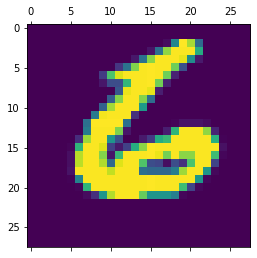

In [46]:
plt.matshow(X_test[9999])

In [47]:
predicted_labels = [np.argmax(i) for i in prediction]

In [48]:
cm = confusion_matrix(y_test, prediction.argmax(axis=1))
print(cm)

[[ 973    1    2    0    0    0    3    1    0    0]
 [   0 1132    0    0    0    0    2    1    0    0]
 [   1    0 1023    0    0    0    1    5    2    0]
 [   1    0    4  994    0    7    0    2    1    1]
 [   0    0    0    0  971    0    4    0    0    7]
 [   1    0    0    2    0  885    4    0    0    0]
 [   2    2    0    0    1    5  948    0    0    0]
 [   0    1   11    0    0    0    0 1013    1    2]
 [   2    0    5    2    0    0    1    0  961    3]
 [   1    2    1    0    9   12    0    4    1  979]]


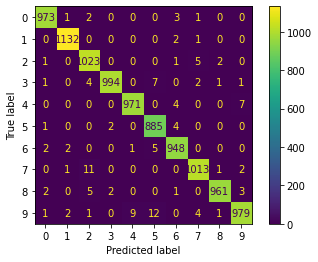

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Text(69.0, 0.5, 'True Label')

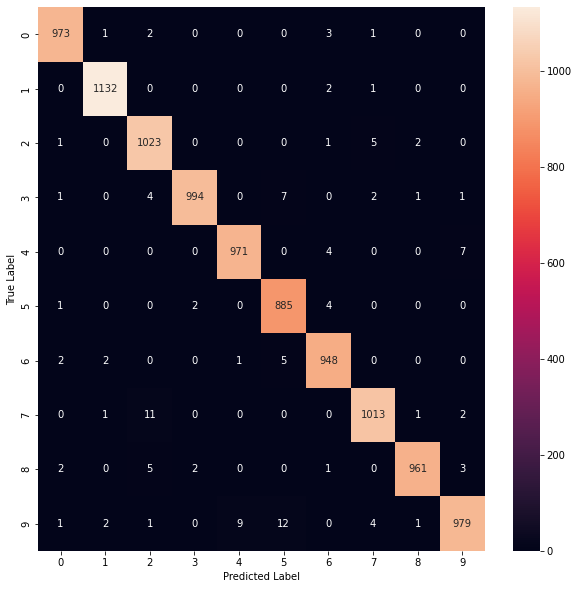

In [50]:
# Alternative Code for Displaying Confusion Matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [51]:
accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

98.79
